# Visualize Stock Prices and Predictions

Import necessary libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

Select stocks to visualize and predictions path if desired

In [15]:
stocks = ['AAPL', 'AMZN']
path = 'predictions\monthly_LSTM'

Visualize current stock prices over the past 5 year

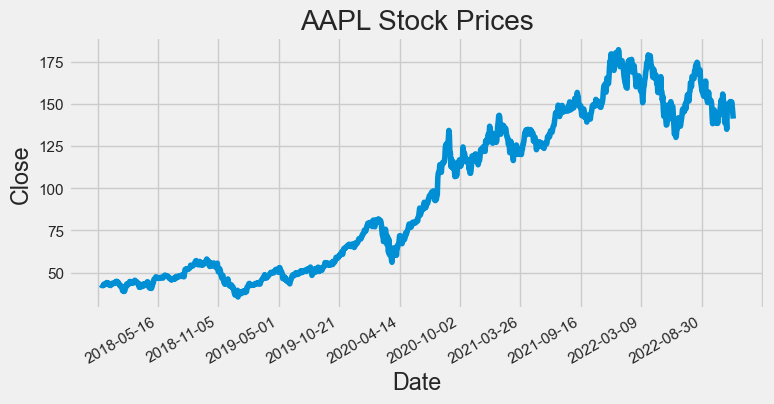

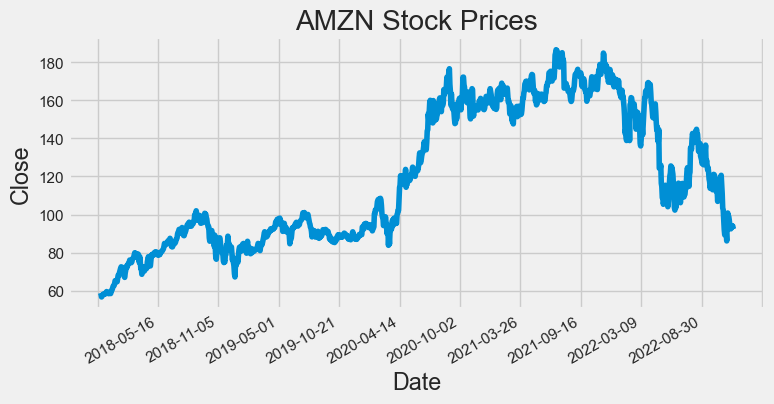

In [17]:
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

for x in stocks:
    data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/{x}?period1=1512000000&period2=1669766400&interval=1d&events=history&includeAdjustedClose=true'.format(x=x))
    
    plt.figure(figsize=(8, 4))
    plt.title("{x} Stock Prices".format(x=x))
    plt.xlabel("Date")
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))
    plt.gcf().autofmt_xdate()
    plt.ylabel("Close")
    plt.plot(data["Date"], data["Close"])
    plt.show()

Visualize past data combined with predictions